# VIJAYAN S

A Project for an internship at "TECHNOHACKS EDUTECH"

Task 7 : Heart Disease Prediction

Dataset : heart.csv

# Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [2]:
dataset = pd.read_csv('/home/vijayan/projects/datasets/heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Verifying it as a 'dataframe' object in pandas

# Exploratory Data Analysis (EDA)

First, analysing the target variable:

target
1    165
0    138
Name: count, dtype: int64


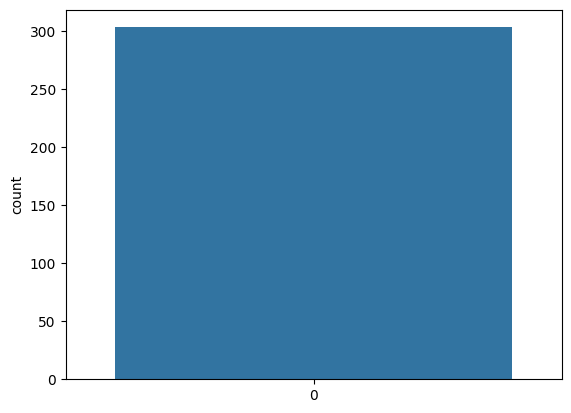

In [3]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [4]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


# Analysing the 'Chest Pain Type' feature

In [5]:
dataset["cp"].unique()

array([3, 2, 1, 0])

As expected, the CP feature has values from 0 to 3

<Axes: xlabel='cp', ylabel='target'>

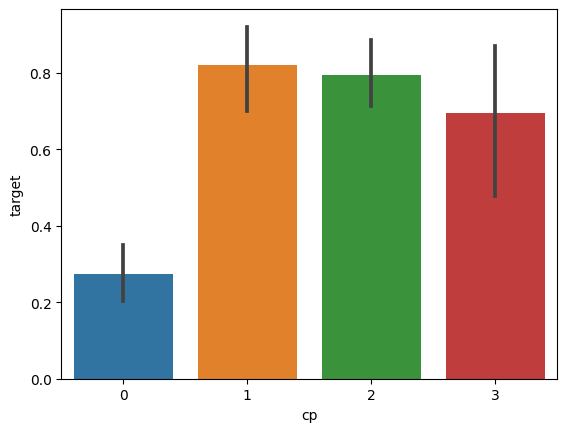

In [6]:
sns.barplot(x=dataset["cp"],y=y)

We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

# Analysing the FBS feature

In [7]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [8]:
dataset["fbs"].unique()

array([1, 0])

<Axes: xlabel='fbs', ylabel='target'>

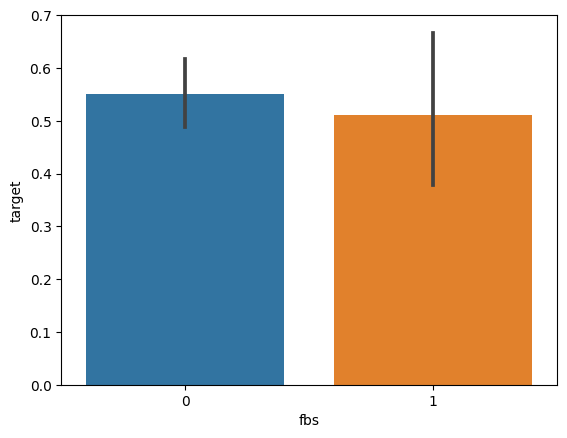

In [9]:
sns.barplot(x=dataset["fbs"],y=y)

Nothing extraordinary here

# Analysing the restecg feature

In [10]:
dataset["restecg"].unique()

array([0, 1, 2])

<Axes: xlabel='restecg', ylabel='target'>

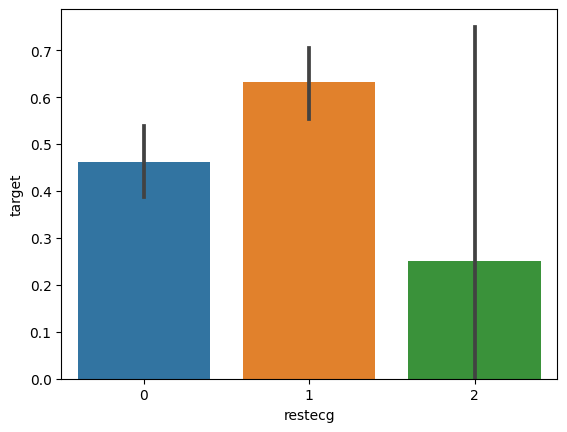

In [11]:
sns.barplot(x=dataset["restecg"],y=y)

We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

# Analysing the 'exang' feature

In [12]:
dataset["exang"].unique()

array([0, 1])

<Axes: xlabel='exang', ylabel='target'>

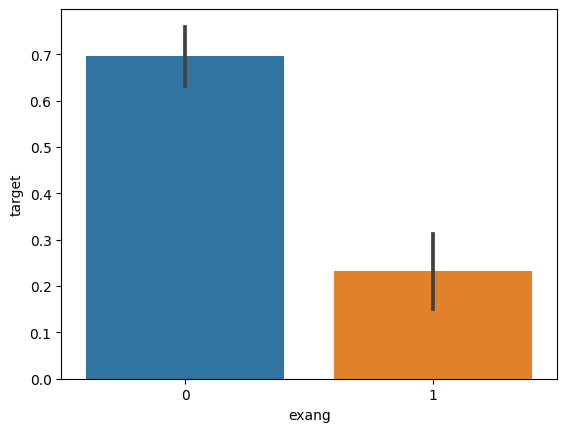

In [13]:
sns.barplot(x=dataset["exang"],y=y)

People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

# Analysing the Slope feature

In [14]:
dataset["slope"].unique()

array([0, 2, 1])

<Axes: xlabel='slope', ylabel='target'>

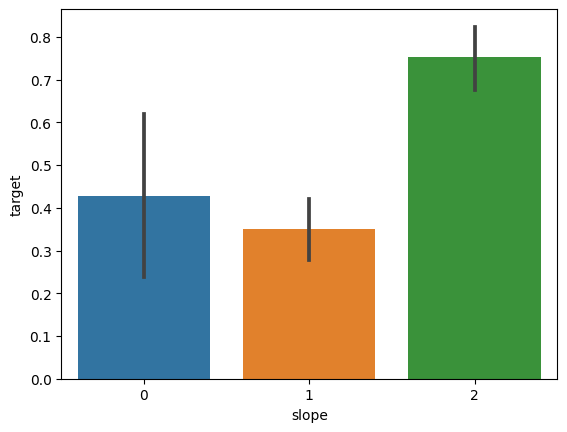

In [15]:
sns.barplot(x=dataset["slope"],y=y)

We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

# Analysing the 'ca' feature

number of major vessels (0-3) colored by flourosopy

In [16]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

<Axes: ylabel='count'>

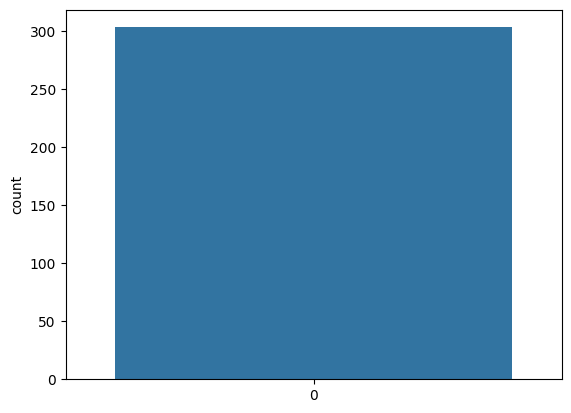

In [17]:
sns.countplot(dataset["ca"])

<Axes: xlabel='ca', ylabel='target'>

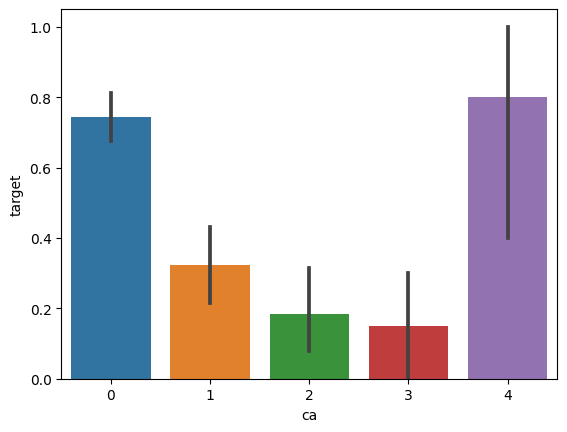

In [18]:
sns.barplot(x=dataset["ca"],y=y)

ca=4 has astonishingly large number of heart patients

### Analysing the 'thal' feature

In [19]:
dataset["thal"].unique()

array([1, 2, 3, 0])

<Axes: xlabel='thal', ylabel='target'>

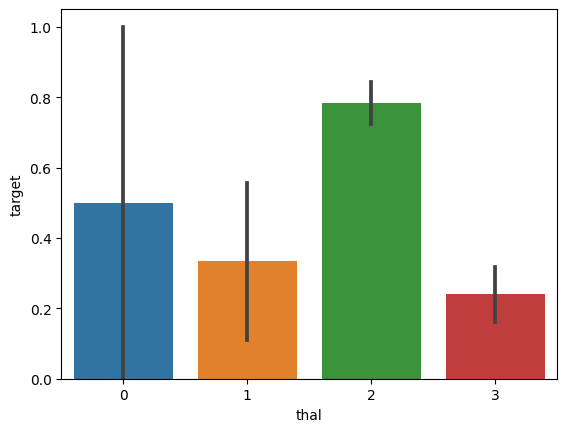

In [20]:
sns.barplot(x=dataset["thal"],y=y)

<Axes: xlabel='thal', ylabel='Density'>

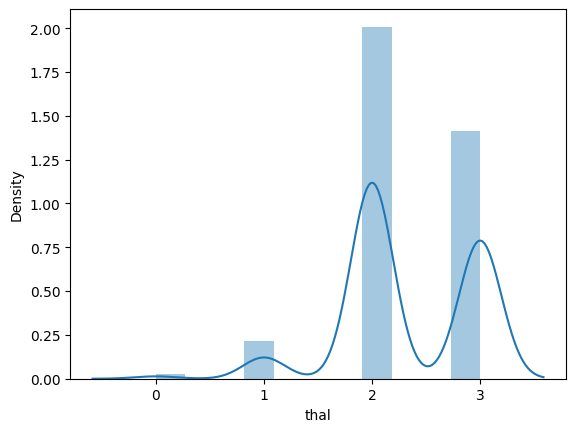

In [21]:
sns.distplot(dataset["thal"])

# IV. Train Test split

In [22]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [23]:
X_train.shape

(242, 13)

In [24]:
X_test.shape

(61, 13)

In [25]:
Y_train.shape

(242,)

In [26]:
Y_test.shape

(61,)

# V. Model Fitting

In [27]:
from sklearn.metrics import accuracy_score

## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [29]:
Y_pred_lr.shape

(61,)

In [30]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


# Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [32]:
Y_pred_nb.shape

(61,)

In [33]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


# SVM

In [34]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [35]:
Y_pred_svm.shape

(61,)

In [36]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


# K Nearest Neighbors

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [38]:
Y_pred_knn.shape

(61,)

In [39]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [41]:
print(Y_pred_dt.shape)

(61,)


In [42]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


# Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0

for x in range(100):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [44]:
Y_pred_rf.shape

(61,)

In [45]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 88.52 %


# XGBoost

In [46]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [47]:
Y_pred_xgb.shape

(61,)

In [48]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 78.69 %


# Neural Network

In [56]:
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

In [57]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [58]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 [==============================] - 1s 5ms/step - loss: 8.4506 - accuracy: 0.5083
Epoch 2/300
8/8 [==============================] - 0s 5ms/step - loss: 7.4841 - accuracy: 0.5826
Epoch 3/300
8/8 [==============================] - 0s 5ms/step - loss: 6.8628 - accuracy: 0.5868
Epoch 4/300
8/8 [==============================] - 0s 6ms/step - loss: 6.2402 - accuracy: 0.5496
Epoch 5/300
8/8 [==============================] - 0s 8ms/step - loss: 5.6975 - accuracy: 0.5289
Epoch 6/300
8/8 [==============================] - 0s 8ms/step - loss: 5.1505 - accuracy: 0.5496
Epoch 7/300
8/8 [==============================] - 0s 6ms/step - loss: 4.7180 - accuracy: 0.5496
Epoch 8/300
8/8 [==============================] - 0s 6ms/step - loss: 4.2859 - accuracy: 0.5537
Epoch 9/300
8/8 [==============================] - 0s 7ms/step - loss: 3.9600 - accuracy: 0.5289
Epoch 10/300
8/8 [==============================] - 0s 7ms/step - loss: 3.5775 - accuracy: 0.5579
Epoch 11/300
8/8 [===========

8/8 [==============================] - 0s 5ms/step - loss: 0.3818 - accuracy: 0.8347
Epoch 168/300
8/8 [==============================] - 0s 6ms/step - loss: 0.3613 - accuracy: 0.8388
Epoch 169/300
8/8 [==============================] - 0s 6ms/step - loss: 0.3609 - accuracy: 0.8388
Epoch 170/300
8/8 [==============================] - 0s 4ms/step - loss: 0.3597 - accuracy: 0.8554
Epoch 171/300
8/8 [==============================] - 0s 6ms/step - loss: 0.3621 - accuracy: 0.8471
Epoch 172/300
8/8 [==============================] - 0s 7ms/step - loss: 0.3732 - accuracy: 0.8388
Epoch 173/300
8/8 [==============================] - 0s 8ms/step - loss: 0.3567 - accuracy: 0.8512
Epoch 174/300
8/8 [==============================] - 0s 7ms/step - loss: 0.3735 - accuracy: 0.8264
Epoch 175/300
8/8 [==============================] - 0s 7ms/step - loss: 0.4039 - accuracy: 0.7975
Epoch 176/300
8/8 [==============================] - 0s 7ms/step - loss: 0.3818 - accuracy: 0.8347
Epoch 177/300
8/8 [=====

In [59]:
Y_pred_nn = model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [53]:
Y_pred_nn.shape

(61, 1)

In [54]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [55]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

The accuracy score achieved using Neural Network is: 80.33 %


# Thank you